In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
#import csv as dataframe
df=pd.read_csv('2007 season.csv')

In [12]:
print(df.shape)
df.head()

(766, 30)


,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away_id,away_team,away_conference,away_points,away_line_scores[0],away_line_scores[1],away_line_scores[2],away_line_scores[3],away_post_win_prob,excitement_index
0,272422433,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,22022,3817.0,...,202,Tulsa,Conference USA,35,14,0,14,7.0,NaN,NaN
1,272422050,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,True,7885,3919.0,...,193,Miami (OH),Mid-American,14,0,7,0,7.0,NaN,NaN
2,272420164,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,43091,3754.0,...,2084,Buffalo,Mid-American,3,0,0,3,0.0,NaN,NaN
3,272422132,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,20223,3854.0,...,2546,Southeast Missouri State,NaN,3,0,3,0,0.0,NaN,NaN
4,272420097,2007,1,regular,2007-08-30T19:30:00.000Z,NaN,False,False,0,3873.0,...,93,Murray State,NaN,10,7,3,0,0.0,NaN,NaN


In [25]:
#rename columns
df_renamed=df.rename(columns={"id": "game_id", "home_line_scores[0]": "Home Q1","home_line_scores[1]": "Home Q2","home_line_scores[2]": "Home Q3",
                   "home_line_scores[3]": "Home Q4","away_line_scores[0]": "Away Q1", "away_line_scores[1]": "Away Q2",
                   "away_line_scores[2]": "Away Q3","away_line_scores[3]": "Away Q4"})
df_renamed.head()

,game_id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away_id,away_team,away_conference,away_points,Away Q1,Away Q2,Away Q3,Away Q4,away_post_win_prob,excitement_index
0,272422433,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,22022,3817.0,...,202,Tulsa,Conference USA,35,14,0,14,7.0,NaN,NaN
1,272422050,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,True,7885,3919.0,...,193,Miami (OH),Mid-American,14,0,7,0,7.0,NaN,NaN
2,272420164,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,43091,3754.0,...,2084,Buffalo,Mid-American,3,0,0,3,0.0,NaN,NaN
3,272422132,2007,1,regular,2007-08-30T19:00:00.000Z,NaN,False,False,20223,3854.0,...,2546,Southeast Missouri State,NaN,3,0,3,0,0.0,NaN,NaN
4,272420097,2007,1,regular,2007-08-30T19:30:00.000Z,NaN,False,False,0,3873.0,...,93,Murray State,NaN,10,7,3,0,0.0,NaN,NaN


In [26]:
#drop unneccesary/blank/null columns
df_dropped=df_renamed.drop(columns=['season_type', 'start_time_tbd', 'home_post_win_prob', 'away_post_win_prob', 'excitement_index'])
print(df_dropped.shape)
df_dropped.head()

(766, 25)


,game_id,season,week,start_date,neutral_site,conference_game,attendance,venue_id,venue,home_id,...,Home Q3,Home Q4,away_id,away_team,away_conference,away_points,Away Q1,Away Q2,Away Q3,Away Q4
0,272422433,2007,1,2007-08-30T19:00:00.000Z,False,False,22022,3817.0,Malone Stadium,2433,...,0,0.0,202,Tulsa,Conference USA,35,14,0,14,7.0
1,272422050,2007,1,2007-08-30T19:00:00.000Z,False,True,7885,3919.0,Scheumann Stadium,2050,...,3,7.0,193,Miami (OH),Mid-American,14,0,7,0,7.0
2,272420164,2007,1,2007-08-30T19:00:00.000Z,False,False,43091,3754.0,High Point Solutions Stadium,164,...,7,3.0,2084,Buffalo,Mid-American,3,0,0,3,0.0
3,272422132,2007,1,2007-08-30T19:00:00.000Z,False,False,20223,3854.0,Nippert Stadium,2132,...,20,20.0,2546,Southeast Missouri State,NaN,3,0,3,0,0.0
4,272420097,2007,1,2007-08-30T19:30:00.000Z,False,False,0,3873.0,Papa John's Cardinal Stadium,97,...,21,3.0,93,Murray State,NaN,10,7,3,0,0.0


In [24]:
#format data

#create new dataframe from df_dropped
df_formatted=df_dropped

#add date column from start_date
df_formatted['date']=df_dropped['start_date'].str[:10]

#add time column from start_date
df_formatted['time']=df_dropped['start_date'].str[11:16]
df_formatted.head()

#fill in blanks in conferences columns with FCS
df_formatted['home_conference'].fillna('FCS', inplace=True)
df_formatted['away_conference'].fillna('FCS', inplace=True)

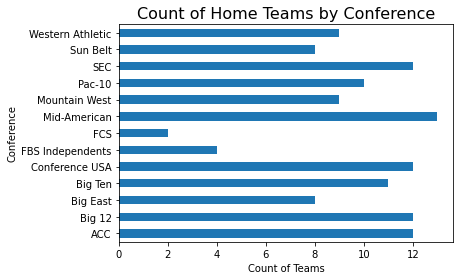

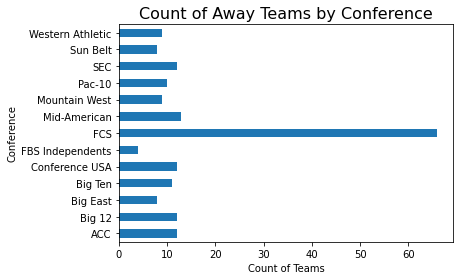

In [80]:
#indentify outliers

#plot number of home teams by conference
df_formatted.groupby('home_conference')['home_team'].nunique().plot(kind='barh')
plt.title("Count of Home Teams by Conference",fontsize=16) 
plt.xlabel("Count of Teams") 
plt.ylabel("Conference") 
plt.show()

#plot number of away teams by conference
df_formatted.groupby('away_conference')['away_team'].nunique().plot(kind='barh')
plt.title("Count of Away Teams by Conference",fontsize=16) 
plt.xlabel("Count of Teams") 
plt.ylabel("Conference") 
plt.show()

FCS "conference" is an outlier as they tend to be single games against FBS teams. FCS teams play a small amount of home games and a large amount of away games, leading to the higher presence in away games.

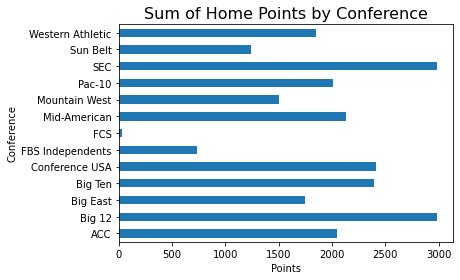

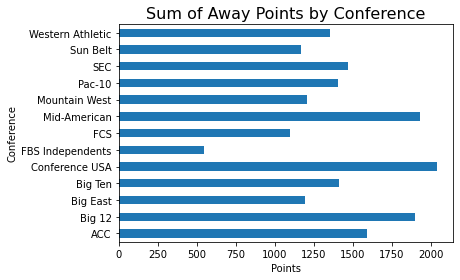

In [84]:
#bar chart of total home team points by conference
df_formatted.groupby('home_conference')['home_points'].sum().plot(kind='barh')
plt.title("Sum of Home Points by Conference",fontsize=16) 
plt.xlabel("Points") 
plt.ylabel("Conference") 
plt.show()

#bar chart of total away team points by conference
df_formatted.groupby('away_conference')['away_points'].sum().plot(kind='barh')
plt.title("Sum of Away Points by Conference",fontsize=16) 
plt.xlabel("Points") 
plt.ylabel("Conference") 
plt.show()


FCS home points are outliers for the same reason as mentioned earlier. FBS independents point totals are low due to fewer teams than other conferences. 

In [111]:
#find z scores for home point values
home_z_score = stats.zscore(df_formatted.home_points)

#find z scores for away point values
away_z_score = stats.zscore(df_formatted.away_points)

#create new dataframe for home outliers
home_outliers = df_formatted[(home_z_score > 3)]

#create new dataframe for away outliers
away_outliers = df_formatted[(away_z_score > 3)]

print(home_outliers[['home_team','home_points','away_team','away_points']])
# print(away_outliers.head())
print('-----------------------------------------------------------------------')
print(away_outliers[['home_team','home_points','away_team','away_points']])

            home_team  home_points           away_team  away_points
47           Oklahoma           79         North Texas           10
97   Western Kentucky           87  West Virginia Tech            0
297        Texas Tech           75  Northwestern State            7
550            Kansas           76            Nebraska           39
-----------------------------------------------------------------------
       home_team  home_points away_team  away_points
427  Boise State           69    Nevada           67
628  North Texas           62      Navy           74


4 home teams scored points above 3 standard deviations. 2 away teams scored points above 3 standard deviations. 

In [93]:
#check for bad data
#if points >100
df_formatted['bad_data']=(df_formatted['home_points']>=100) | (df_formatted['away_points']>=100)
df_formatted.bad_data.sum()

0

No games with either team scoring more than 100 points so data appears to be reasonable.

In [119]:
conda install -c conda-forge python-levenshtein

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\loosm\Anaconda

  added / updated specs:
    - python-levenshtein


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py38h9bdc248_2         3.1 MB  conda-forge
    python-levenshtein-0.12.0  |py38h1e8a9f7_1004          82 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python-levenshtein conda-forge/win-64::python-levenshtein-0.12.0-py38h1e8a9f7_1004
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> conda-forge::conda-4.8.5-py3



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda




In [120]:
from Levenshtein import distance

In [140]:
#Using fuzzy matching to test some team names that are commonly abbreviated
#if team in home_team column has a Levenshtein value of 0 then print team name
#break after first instance
#Testing: BYU, SMU, Penn State, NC State, LSU, TCU, Ole Miss, UCLA, UCF, USC

test = "BYU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break    
 
test = "SMU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
   
test = "Penn State"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "NC State"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "LSU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "TCU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "Ole Miss"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCF"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCLA"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "USC"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break


BYU: 0
SMU: 0
Penn State: 0
NC State: 0
LSU: 0
TCU: 0
Ole Miss: 0
UCF: 0
UCLA: 0
USC: 0


Data uses teams' standard abbreviations. 
